In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# a nice way of filtering out deprecated warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import data
yellow_01=pd.read_csv("yellow_tripdata_2019-02.csv")


In [ ]:
yellow_01

In [4]:
#check missing value
yellow_01.isnull().sum()


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [5]:
yellow_01.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [6]:
#remove_invalid_data
#passenger_count=0
cleaned_yellow01=yellow_01[yellow_01['passenger_count']!=0]
sorted_df = cleaned_yellow01.sort_values(by='passenger_count')

print (sorted_df)


         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2019-03-01 00:24:41   2019-03-01 00:25:31                1   
4784891         2  2019-03-19 17:49:29   2019-03-19 17:55:49                1   
4784890         1  2019-03-19 17:52:55   2019-03-19 17:57:56                1   
4784889         1  2019-03-19 17:39:44   2019-03-19 17:51:17                1   
4784886         2  2019-03-19 17:01:00   2019-03-19 17:10:54                1   
...           ...                  ...                   ...              ...   
1567613         2  2019-03-07 09:42:42   2019-03-07 09:42:56                9   
2006275         2  2019-03-08 18:13:40   2019-03-08 18:13:43                9   
2155140         2  2019-03-09 10:03:18   2019-03-09 10:03:22                9   
2717338         2  2019-03-11 15:01:45   2019-03-11 15:46:30                9   
311548          2  2019-03-02 02:14:05   2019-03-02 02:37:15                9   

         trip_distance  Rat

In [7]:
#trip_distance=0
cleaned_yellow01=yellow_01[yellow_01['trip_distance']!=0]
#fare_amont
cleaned_yellow01=cleaned_yellow01[cleaned_yellow01['fare_amount']>=2.5]
#tip_amont
cleaned_yellow01=cleaned_yellow01[cleaned_yellow01['tip_amount']>=0]
#total payment
cleaned_yellow01=cleaned_yellow01[cleaned_yellow01['total_amount']>=2.5]
#trip_distance
cleaned_yellow01=cleaned_yellow01[cleaned_yellow01['trip_distance']>=1]


In [8]:
sorted_df = cleaned_yellow01.sort_values(by='tpep_pickup_datetime')

print (sorted_df)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1189873         2  2008-12-31 23:02:10   2009-01-01 22:15:28                1   
3393902         2  2008-12-31 23:03:17   2009-01-01 07:57:30                2   
5733582         2  2008-12-31 23:03:52   2008-12-31 23:22:12                1   
4927768         2  2008-12-31 23:07:03   2008-12-31 23:19:26                1   
4932718         2  2009-01-01 00:02:19   2009-01-01 09:43:46                1   
...           ...                  ...                   ...              ...   
4886073         2  2019-06-12 10:53:35   2019-06-12 11:00:06                1   
6192038         2  2019-07-30 15:01:44   2019-07-30 15:13:39                2   
6202286         2  2019-07-30 15:38:07   2019-07-30 15:56:56                2   
6212548         2  2019-08-20 23:28:21   2019-08-20 23:41:03                2   
4896351         2  2041-03-25 01:38:28   2041-03-25 06:50:31                2   

         trip_distance  Rat

In [9]:
#remove data ouside data period
cleaned_yellow01=cleaned_yellow01[cleaned_yellow01['tpep_pickup_datetime']>("2019-02-31 23:59:59")]

cleaned_yellow01=cleaned_yellow01[cleaned_yellow01['tpep_pickup_datetime']<("2019-03-31 23:59:59")]

cleaned_yellow01=cleaned_yellow01[cleaned_yellow01['tpep_dropoff_datetime']>("2019-02-31 23:59:59")]

cleaned_yellow01=cleaned_yellow01[cleaned_yellow01['tpep_dropoff_datetime']<("2019-03-31 23:59:59")]



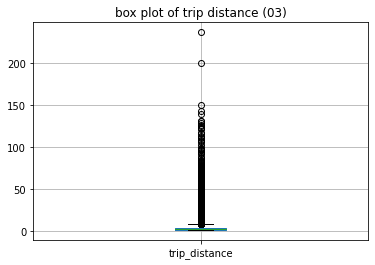

In [10]:
#remove noisy data
distance_boxplot=cleaned_yellow01.boxplot(column='trip_distance')
plt.title("box plot of trip distance (03)")
plt.savefig('Trip_distance03.jpg')

In [11]:
#remove outlier
Q1=cleaned_yellow01.quantile(0.25)
Q3=cleaned_yellow01.quantile(0.75)
IQR=Q3-Q1
cleaned=cleaned_yellow01[~((cleaned_yellow01<(Q1-3*IQR))|(cleaned_yellow01>(Q3+3*IQR))).any(axis=1)]
sorted_df = cleaned.sort_values(by='trip_distance')

sorted_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3397975,1,2019-03-14 07:28:58,2019-03-14 07:36:44,1,1.00,1,N,170,230,1,7.0,2.5,0.5,1.03,0.0,0.3,11.33,2.5
6503889,2,2019-03-26 17:06:36,2019-03-26 17:10:43,2,1.00,1,N,238,239,1,5.5,1.0,0.5,1.96,0.0,0.3,11.76,2.5
4906189,1,2019-03-20 07:03:26,2019-03-20 07:08:42,1,1.00,1,N,100,161,1,6.0,2.5,0.5,1.00,0.0,0.3,10.30,2.5
6503907,1,2019-03-26 17:26:04,2019-03-26 17:32:14,1,1.00,1,N,230,50,1,6.0,3.5,0.5,2.05,0.0,0.3,12.35,2.5
845863,1,2019-03-04 14:56:56,2019-03-04 15:01:50,1,1.00,1,N,230,50,1,5.5,2.5,0.5,1.75,0.0,0.3,10.55,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235964,2,2019-03-13 15:25:37,2019-03-13 16:12:14,1,11.48,1,N,138,231,1,37.5,0.0,0.5,5.00,0.0,0.3,45.80,2.5
487370,2,2019-03-02 20:30:57,2019-03-02 21:09:23,2,11.48,1,N,100,20,1,38.0,0.5,0.5,0.00,0.0,0.3,41.80,2.5
4987712,2,2019-03-20 14:43:53,2019-03-20 15:25:48,1,11.48,1,N,231,207,1,35.0,0.0,0.5,7.66,0.0,0.3,45.96,2.5
4212880,2,2019-03-17 01:11:58,2019-03-17 01:34:13,2,11.48,1,N,138,231,1,34.0,0.5,0.5,5.00,0.0,0.3,42.80,2.5


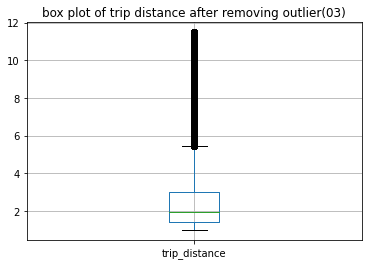

In [12]:
#box plot after removing
distance_boxplot=cleaned.boxplot(column='trip_distance')
plt.title("box plot of trip distance after removing outlier(03)")
plt.savefig('Trip_distance(remove outlier)03.jpg')

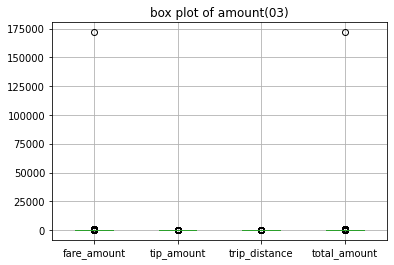

In [13]:
amount=["fare_amount","tip_amount","trip_distance","total_amount"]
payment_boxplot=cleaned_yellow01.boxplot(column=amount)
plt.title("box plot of amount(03)")
plt.savefig('box plot of amount03.jpg')

In [14]:
#remove outlier
Q1=cleaned_yellow01[amount].quantile(0.25)
Q3=cleaned_yellow01[amount].quantile(0.75)
IQR=Q3-Q1
cleaned=cleaned[~((cleaned[amount]<(Q1-3*IQR))|(cleaned[amount]>(Q3+3*IQR))).any(axis=1)]
sorted_df = cleaned.sort_values(by='fare_amount')

print (sorted_df)


         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4453863         2  2019-03-18 08:54:26   2019-03-18 09:02:20                1   
4468786         1  2019-03-18 09:34:09   2019-03-18 09:34:19                1   
4079276         1  2019-03-16 16:09:54   2019-03-16 16:09:58                1   
3316155         1  2019-03-13 20:57:04   2019-03-13 20:57:13                1   
7244986         1  2019-03-29 16:46:27   2019-03-29 16:46:28                1   
...           ...                  ...                   ...              ...   
1317199         2  2019-03-06 11:04:22   2019-03-06 12:04:09                5   
5660471         2  2019-03-22 22:20:38   2019-03-22 23:12:43                1   
4076603         1  2019-03-16 16:00:55   2019-03-16 17:03:05                1   
7242971         1  2019-03-29 15:22:53   2019-03-29 16:24:51                1   
7233990         2  2019-03-29 15:50:14   2019-03-29 16:52:32                1   

         trip_distance  Rat

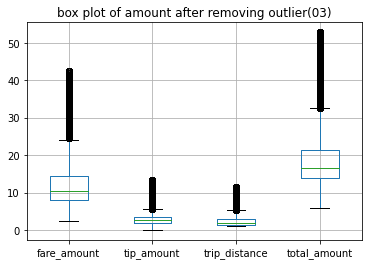

In [15]:
amount_boxplot=cleaned.boxplot(column=amount)
plt.title("box plot of amount after removing outlier(03)")
plt.savefig('box plot of amount after removing outlier 03.jpg')

In [16]:
sorted_df = cleaned.sort_values(by='trip_distance')

In [17]:
#calculate trip duration
cleaned_yellow01['time']=pd.to_datetime(
    cleaned_yellow01['tpep_dropoff_datetime'])-pd.to_datetime(cleaned_yellow01['tpep_pickup_datetime'])
cleaned_yellow01['trip duration']=cleaned_yellow01['time'].dt.total_seconds()
#calculate pick up time
cleaned_yellow01['pick up time']=pd.to_datetime(cleaned_yellow01['tpep_pickup_datetime']).dt.hour

In [18]:
cleaned.reset_index().to_csv("cleaned_yellow03.csv")